In [1]:
#wildlife conservation using image recognition

#import module 

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TerminateOnNaN
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [2]:
# Reads the image from the given path and store data in the apporpriate lists

def read_image(path, images, labels, filenames):
    
    for root, dirs, files in os.walk(path):

        for name in dirs:
            
            direct = os.path.join(path, name)
            
            for filename in os.listdir(direct):
                
                img = cv.imread(os.path.join(path + "/" + name, filename))
                labels.append(name)
                img = cv.resize(img, Image_Size)
                images.append(img)
                filenames.append(name + '/' + filename)

In [3]:
Image_Size = (224,224)

In [4]:
# Reading images from the storage

path = './animals/aaa/'
labels = []
filenames = []
images = []


read_image(path=path, images=images, labels=labels, filenames=filenames)

In [5]:
# Making df from the images read
df = pd.DataFrame({        
    'filename' : filenames,
    'category' : labels
    })

In [6]:
# Deleting the list to save space as they aren't needed

del labels
del filenames
del images

In [7]:
# List of the categories


print(df['category'].unique())

['badger' 'bat' 'bear' 'elephant' 'tiger']


In [8]:
# Spliting the dataset to train and val

train, val = train_test_split(df, test_size=0.3)

In [9]:
# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    preprocessing_function=lambda image: tf.image.resize(image, Image_Size)
)

# Apply data augmentation to your training data
augmented_images = datagen.flow_from_dataframe(
                            dataframe=train, directory=path,
                            x_col='filename',
                            y_col='category',
                            target_size=Image_Size
)

test_gen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda image: tf.image.resize(image, (224, 224))
)

test_images = test_gen.flow_from_dataframe(
        dataframe=val,
        directory=path,
        x_col='filename',
        y_col='category',
        target_size=Image_Size
)

Found 148 validated image filenames belonging to 5 classes.
Found 64 validated image filenames belonging to 5 classes.


In [10]:
# list of classes

test_images.class_indices

{'badger': 0, 'bat': 1, 'bear': 2, 'elephant': 3, 'tiger': 4}

In [11]:
# declaring output layer unit

num_classes = len(df['category'].unique())

In [12]:
# Model creation
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(64 (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#train model using dataset
#history = model.fit(augmented_images, epochs=10, validation_data=test_images, callbacks=[TerminateOnNaN()])
model.fit(augmented_images, epochs=15, validation_data=test_images, callbacks=[TerminateOnNaN()])

Epoch 1/15
5/5 [==============================] - 19s 3s/step - loss: 1.5328 - accuracy: 0.2365 - val_loss: 1.8249 - val_accuracy: 0.2188
Epoch 2/15
5/5 [==============================] - 15s 3s/step - loss: 1.4416 - accuracy: 0.3986 - val_loss: 1.5644 - val_accuracy: 0.3281
Epoch 3/15
5/5 [==============================] - 15s 3s/step - loss: 1.3953 - accuracy: 0.3716 - val_loss: 1.6157 - val_accuracy: 0.3594
Epoch 4/15
5/5 [==============================] - 15s 3s/step - loss: 1.3510 - accuracy: 0.4122 - val_loss: 1.5112 - val_accuracy: 0.4062
Epoch 5/15
5/5 [==============================] - 15s 3s/step - loss: 1.2770 - accuracy: 0.5203 - val_loss: 1.5384 - val_accuracy: 0.3750
Epoch 6/15
5/5 [==============================] - 15s 3s/step - loss: 1.2341 - accuracy: 0.5203 - val_loss: 1.4584 - val_accuracy: 0.4531
Epoch 7/15
5/5 [==============================] - 15s 3s/step - loss: 1.1337 - accuracy: 0.6014 - val_loss: 1.4740 - val_accuracy: 0.4531
Epoch 8/15
5/5 [==================

In [1]:
# Save the model
model.save('tell_model.h5')


NameError: name 'model' is not defined

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

Epoch 1/10
5/5 [==============================] - 17s 4s/step - loss: 0.5767 - accuracy: 0.7635 - val_loss: 1.3320 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: 0.5554 - accuracy: 0.7905 - val_loss: 1.5570 - val_accuracy: 0.5469
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.5939 - accuracy: 0.7770 - val_loss: 1.6535 - val_accuracy: 0.4844
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 0.6337 - accuracy: 0.7703 - val_loss: 1.8147 - val_accuracy: 0.4531
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 0.5885 - accuracy: 0.7770 - val_loss: 1.4817 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 16s 3s/step - loss: 0.5521 - accuracy: 0.7905 - val_loss: 1.8862 - val_accuracy: 0.4688
Epoch 7/10
5/5 [==============================] - 16s 3s/step - loss: 0.4597 - accuracy: 0.8446 - val_loss: 1.4548 - val_accuracy: 0.5625
Epoch 8/10
5/5 [==================

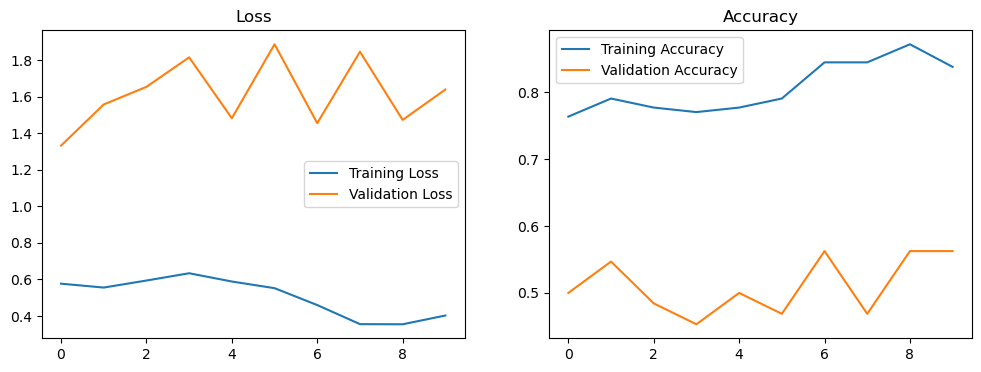

In [17]:
#import module and used train dataset to make  Graph Repersentaion

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

# Define a custom callback to collect training metrics
class TrainingMetricsCallback(Callback):
    def on_train_begin(self, logs=None):
        self.training_losses = []
        self.training_accuracies = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        self.ax1 = ax1
        self.ax2 = ax2

    def on_epoch_end(self, epoch, logs=None):
        self.training_losses.append(logs['loss'])
        self.training_accuracies.append(logs['accuracy'])
        self.validation_losses.append(logs['val_loss'])
        self.validation_accuracies.append(logs['val_accuracy'])
        self.ax1.cla()
        self.ax2.cla()
        self.ax1.plot(self.training_losses, label='Training Loss')
        self.ax1.plot(self.validation_losses, label='Validation Loss')
        self.ax2.plot(self.training_accuracies, label='Training Accuracy')
        self.ax2.plot(self.validation_accuracies, label='Validation Accuracy')
        self.ax1.legend()
        self.ax2.legend()
        self.ax1.set_title('Loss')
        self.ax2.set_title('Accuracy')
        self.fig.canvas.draw()

# Create an instance of the custom callback
training_metrics_callback = TrainingMetricsCallback()
model.fit(augmented_images, epochs=10, validation_data=test_images, callbacks=[training_metrics_callback])